In [1]:
! pip install sklearn-pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper 

import torch # For building the networks 
import torchtuples as tt # Some useful functions
# change pycox import datasets and df= read.csv

In [2]:
unpickled_days260_curve_wait=pd.read_pickle("D:/UNOS_NEW/days260_curve_wait3_redo.pkl")
unpickled_days260_curve_wait

,0
0.000000,0.997367
20.277777,0.985509
40.555554,0.973651
60.833331,0.961792
81.111108,0.949934
...,...
1743.888867,0.186378
1764.166650,0.158920
1784.444434,0.131462
1804.722217,0.104004


In [3]:
days260_curve_wait=unpickled_days260_curve_wait.iloc[0:14,]

In [4]:
days260_curve_wait

,0
0.000000,0.997367
20.277777,0.985509
40.555554,0.973651
60.833331,0.961792
81.111108,0.949934
101.388885,0.938076
121.666663,0.926218
141.944440,0.914359
162.222217,0.902501
182.499994,0.890643


In [5]:
unpickled_days260_curve_no=pd.read_pickle("D:/UNOS_NEW/days260_curve_no3_redo.pkl")
unpickled_days260_curve_no

,0
0.000000,0.998824
20.277777,0.982137
40.555554,0.965451
60.833331,0.948765
81.111108,0.932079
...,...
1743.888867,0.149762
1764.166650,0.125967
1784.444434,0.102172
1804.722217,0.078377


In [6]:
days260_curve_no_3yr=unpickled_days260_curve_no.iloc[1:41,]

In [7]:
days260_curve_no_3yr

,0
20.277777,0.982137
40.555554,0.965451
60.833331,0.948765
81.111108,0.932079
101.388885,0.915392
121.666663,0.898706
141.944440,0.882020
162.222217,0.865333
182.499994,0.848647
202.777771,0.831961


In [8]:
days260_curve_no_3yr=days260_curve_no_3yr*0.843293

In [9]:
days260_curve_no_3yr

,0
20.277777,0.828230
40.555554,0.814158
60.833331,0.800087
81.111108,0.786015
101.388885,0.771944
121.666663,0.757873
141.944440,0.743801
162.222217,0.729730
182.499994,0.715658
202.777771,0.701587


In [10]:
surv_260_3yrs=days260_curve_wait.append(days260_curve_no_3yr, sort=False)

In [11]:
surv_260_3yrs.reset_index(inplace=True)

In [12]:
surv_260_3yrs=surv_260_3yrs.drop('index', 1)

C:\Users\xiaoz\AppData\Local\Temp/ipykernel_6100/2047685144.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  surv_260_3yrs=surv_260_3yrs.drop('index', 1)


In [13]:
surv_260_3yrs

,0
0,0.997367
1,0.985509
2,0.973651
3,0.961792
4,0.949934
5,0.938076
6,0.926218
7,0.914359
8,0.902501
9,0.890643


In [14]:
unpickled_days260_curve_have=pd.read_pickle("D:/UNOS_NEW/days260_curve_have3_redo.pkl")
unpickled_days260_curve_have

,0
0.000000,0.974236
20.266667,0.968783
40.533334,0.963330
60.800002,0.957878
81.066669,0.952425
...,...
1742.933350,0.153022
1763.200012,0.138643
1783.466675,0.124264
1803.733337,0.109885


In [15]:
unpickled_days260_curve_have.reset_index(inplace=True)

In [16]:
unpickled_days260_curve_have

,index,0
0,0.000000,0.974236
1,20.266667,0.968783
2,40.533334,0.963330
3,60.800002,0.957878
4,81.066669,0.952425
...,...,...
86,1742.933350,0.153022
87,1763.200012,0.138643
88,1783.466675,0.124264
89,1803.733337,0.109885


In [17]:
unpickled_days260_curve_have=unpickled_days260_curve_have.drop('index', 1)

C:\Users\xiaoz\AppData\Local\Temp/ipykernel_6100/1059493067.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  unpickled_days260_curve_have=unpickled_days260_curve_have.drop('index', 1)


In [18]:
unpickled_days260_curve_have

,0
0,0.974236
1,0.968783
2,0.963330
3,0.957878
4,0.952425
...,...
86,0.153022
87,0.138643
88,0.124264
89,0.109885


In [19]:
days260_curve_have_3yrs=unpickled_days260_curve_have.iloc[0:54,]

In [20]:
days260_curve_have_3yrs

,0
0,0.974236
1,0.968783
2,0.963330
3,0.957878
4,0.952425
5,0.946972
6,0.941519
7,0.936066
8,0.930613
9,0.925160


In [21]:
surv260_3yrs=pd.concat([surv_260_3yrs,days260_curve_have_3yrs],axis=1)

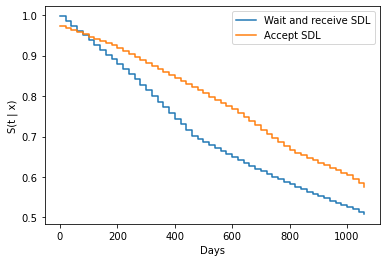

In [23]:
surv260_3yrs.plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Days')
plt.xticks(np.arange(55),[ 0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,
                         800,820,840,860,880,900,920,940,960,980,1000,1020,1040,1060,1080])
plt.locator_params(axis='x',nbins=6)
plt.legend(["Wait and receive SDL","Accept SDL"])
plt.savefig("D:/UNOS_NEW/days260 curves for article final3_redo.jpg")